In [2]:
import sys
sys.path.append('/home/zhw272/programming/pipeline_utility/in_development/Will')
sys.path.append('/home/zhw272/programming/pipeline_utility/src')
from cell_extractor.CellDetectorTrainer import CellDetectorTrainer

ModuleNotFoundError: No module named 'cell_extractor'

In [5]:
trainer = CellDetectorTrainer('DK55',round=2,segmentation_threshold=2300)
trainer.list_detectors()

{'eta': 0.3, 'objective': 'binary:logistic', 'nthread': 7}


['detector_round_2_threshold_2300.pkl',
 'detector_round_2_threshold_2200.pkl',
 'detector_round_2_threshold_2100.pkl',
 'detector_round_2.pkl',
 'detector_round_2_threshold_2000.pkl',
 'detector_round_1.pkl',
 'detector_round_2_threshold_2700.pkl']

In [4]:
features = trainer.load_new_features()
print(sum(features.label==1),len(features))

12588 103141


(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)


/usr/local/share/pipeline/lib/python3.6/site-packages/xgboost/training.py:17: UserWarning:

Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html

/usr/local/share/pipeline/lib/python3.6/site-packages/xgboost/training.py:17: UserWarning:

Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html



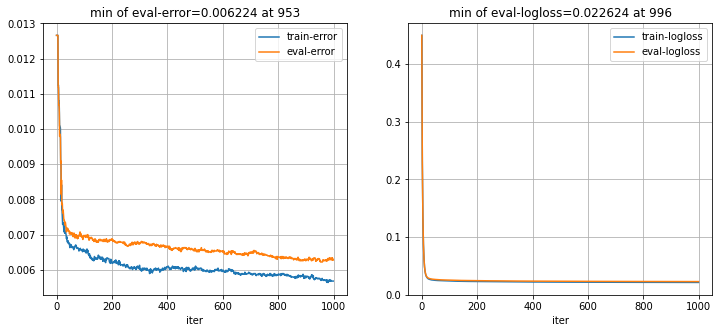

1
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)


/usr/local/share/pipeline/lib/python3.6/site-packages/xgboost/training.py:17: UserWarning:

Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html

/usr/local/share/pipeline/lib/python3.6/site-packages/xgboost/training.py:17: UserWarning:

Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html



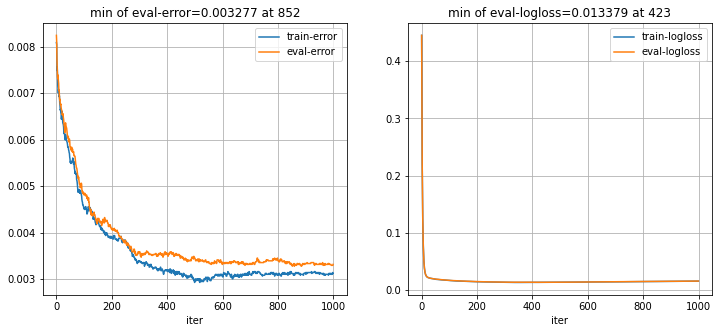

3
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)


/usr/local/share/pipeline/lib/python3.6/site-packages/xgboost/training.py:17: UserWarning:

Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html

/usr/local/share/pipeline/lib/python3.6/site-packages/xgboost/training.py:17: UserWarning:

Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html



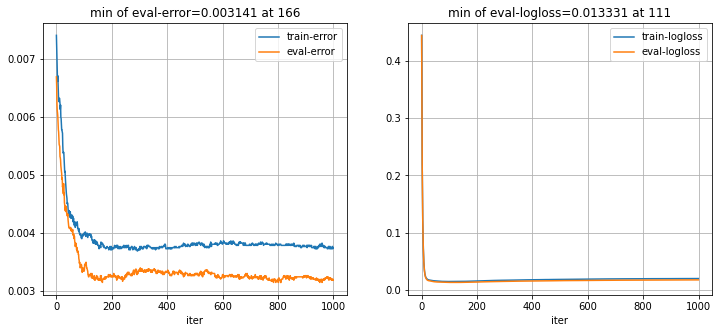

5
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)


/usr/local/share/pipeline/lib/python3.6/site-packages/xgboost/training.py:17: UserWarning:

Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html

/usr/local/share/pipeline/lib/python3.6/site-packages/xgboost/training.py:17: UserWarning:

Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html



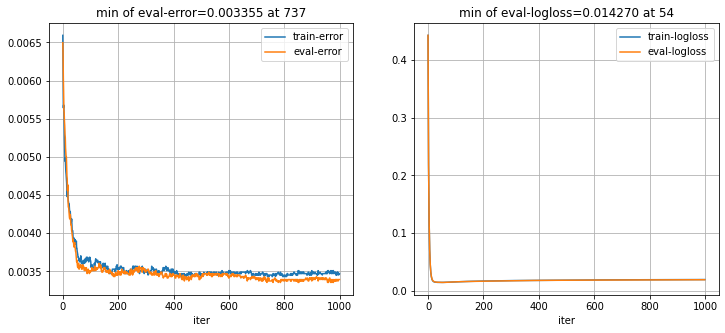

7


In [45]:
trainer.test_xgboost(features,depths=[1,3,5,7])

(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (103141, 41)
(51570, 41) (51571, 41) (51570,) (

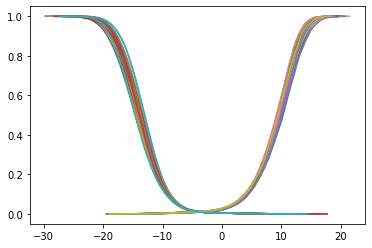

In [47]:
bsts = trainer.train_classifier(features,depth=3,niter = 852)

In [48]:
trainer.model = bsts
trainer.save_detector()

In [ ]:
trainer.load_detector()

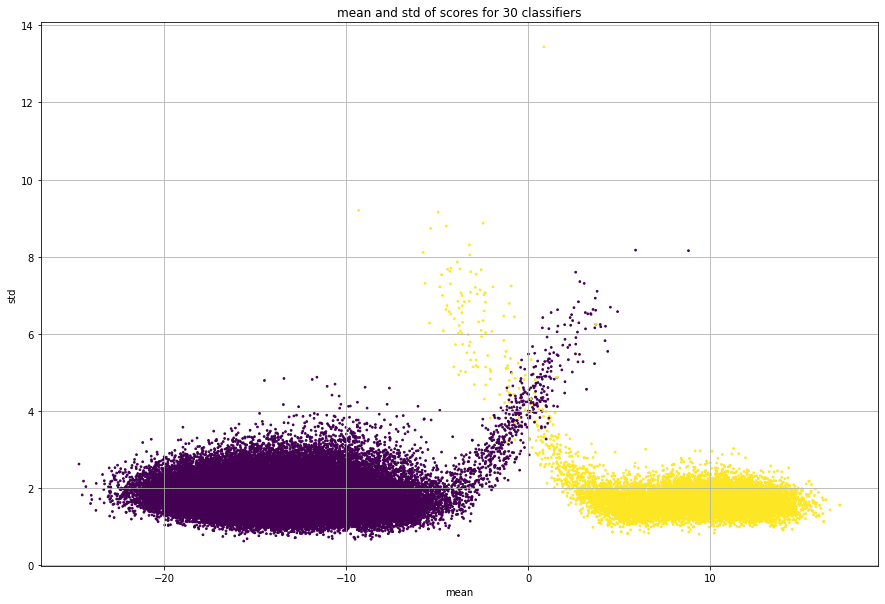

In [50]:
trainer.plot_score_scatter(features)

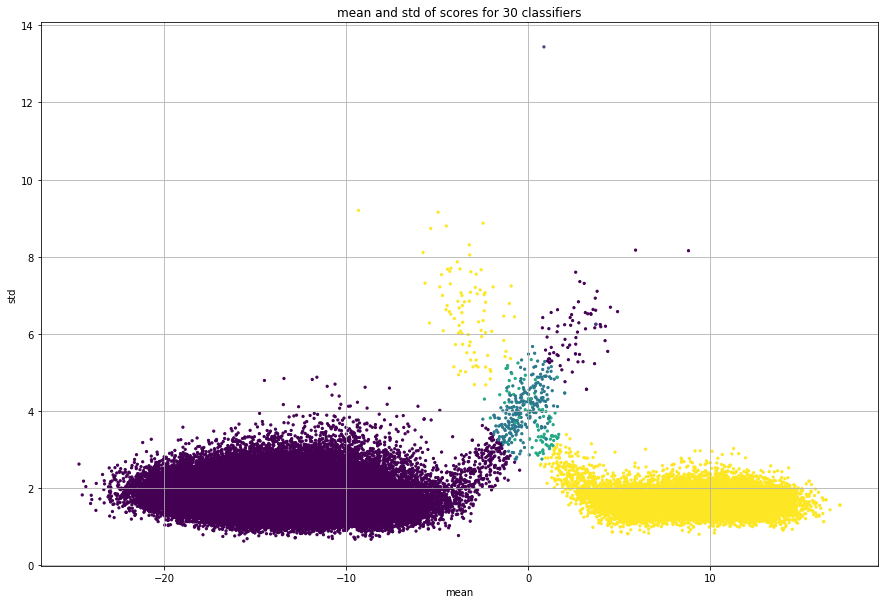

In [52]:
trainer.predictor.set_boundary_points([[0, 2.3], [3, 4], [0, 6], [-3, 4], [-10, 5], [10, 5]])
trainer.plot_decision_scatter(features)

In [53]:
trainer.save_predictions(features)

In [28]:
# trainer.add_detection_to_database()